<a href="https://colab.research.google.com/github/Tar-ive/Kawsay--The-Healthy-AI-/blob/main/Kawsay_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from sqlalchemy import create_engine
import pandas as pd

# create engine
engine = create_engine('sqlite:///health_tracker.db')

# read data from the database
df = pd.read_sql_table('users', engine)

# print the first 5 rows of the dataframe
print(df.head())

   id  age  gender  weight  height  current_bmi  bmi_goal  \
0   1   25    male      70     175           22        20   
1   2   28    male      70     180           22        20   
2   3   35  female      65     165           25        23   
3   4   32    male      51       6           22        29   
4   5   60  female     117       4           16        24   

                      nutrient_requirements     food_preferences  \
0  {'protein': 50, 'carbs': 150, 'fat': 50}  [vegetarian, spicy]   
1  {'protein': 80, 'carbs': 150, 'fat': 40}        [meat, spicy]   
2  {'protein': 60, 'carbs': 150, 'fat': 30}  [vegetarian, salty]   
3  {'protein': 95, 'carbs': 127, 'fat': 41}          [egg, milk]   
4  {'protein': 61, 'carbs': 151, 'fat': 25}     [rice, lentials]   

          dietary_restrictions  
0                [gluten-free]  
1                           []  
2                           []  
3  [lactose-free, gluten-free]  
4               [lactose-free]  


In [5]:
numeric_cols = ['age', 'weight', 'height', 'current_bmi', 'bmi_goal']
categorical_cols = ['gender', 'nutrient_requirements', 'food_preferences', 'dietary_restrictions']
numeric_df = df[numeric_cols]
categorical_df = df[categorical_cols]

              age      weight      height  current_bmi    bmi_goal
count  203.000000  203.000000  203.000000   203.000000  203.000000
mean    41.354680   83.211823    7.374384    24.763547   24.083744
std     13.320955   19.712776   20.405244     5.982090    5.570243
min     18.000000   50.000000    4.000000    15.000000   15.000000
25%     31.000000   66.000000    4.000000    19.000000   19.000000
50%     40.000000   84.000000    5.000000    25.000000   24.000000
75%     54.000000  100.000000    6.000000    29.500000   29.000000
max     64.000000  118.000000  180.000000    34.000000   34.000000


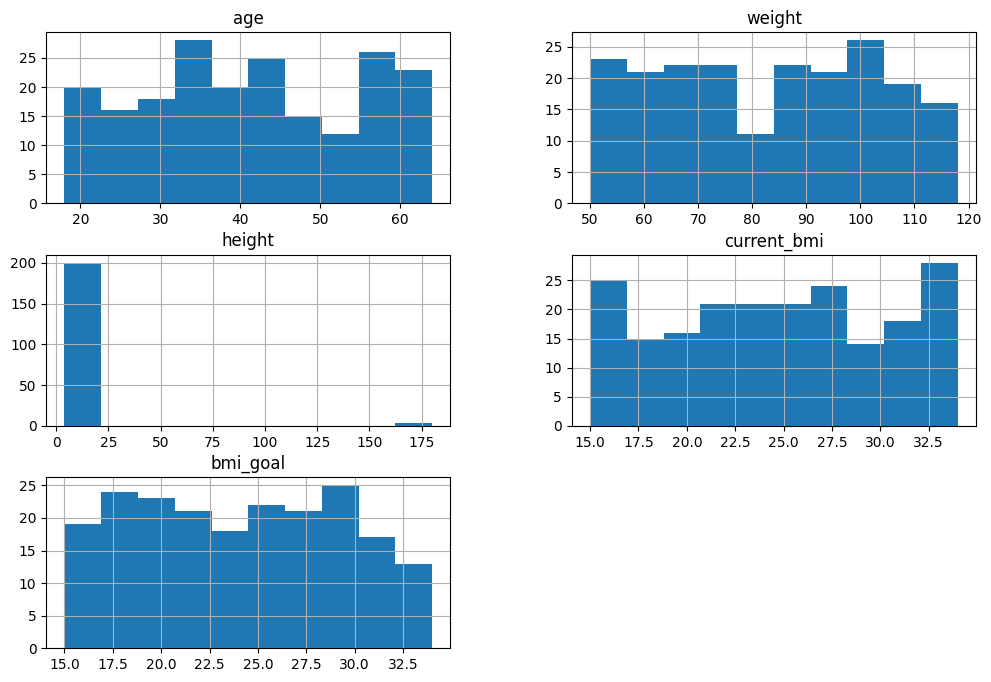

In [6]:
import matplotlib.pyplot as plt

# get summary statistics for numeric dataframe
print(numeric_df.describe())

# create histograms for numeric columns
numeric_df.hist(figsize=(12, 8))
plt.show()


In [7]:
import numpy as np

In [8]:
corr_matrix = numeric_df.corr()

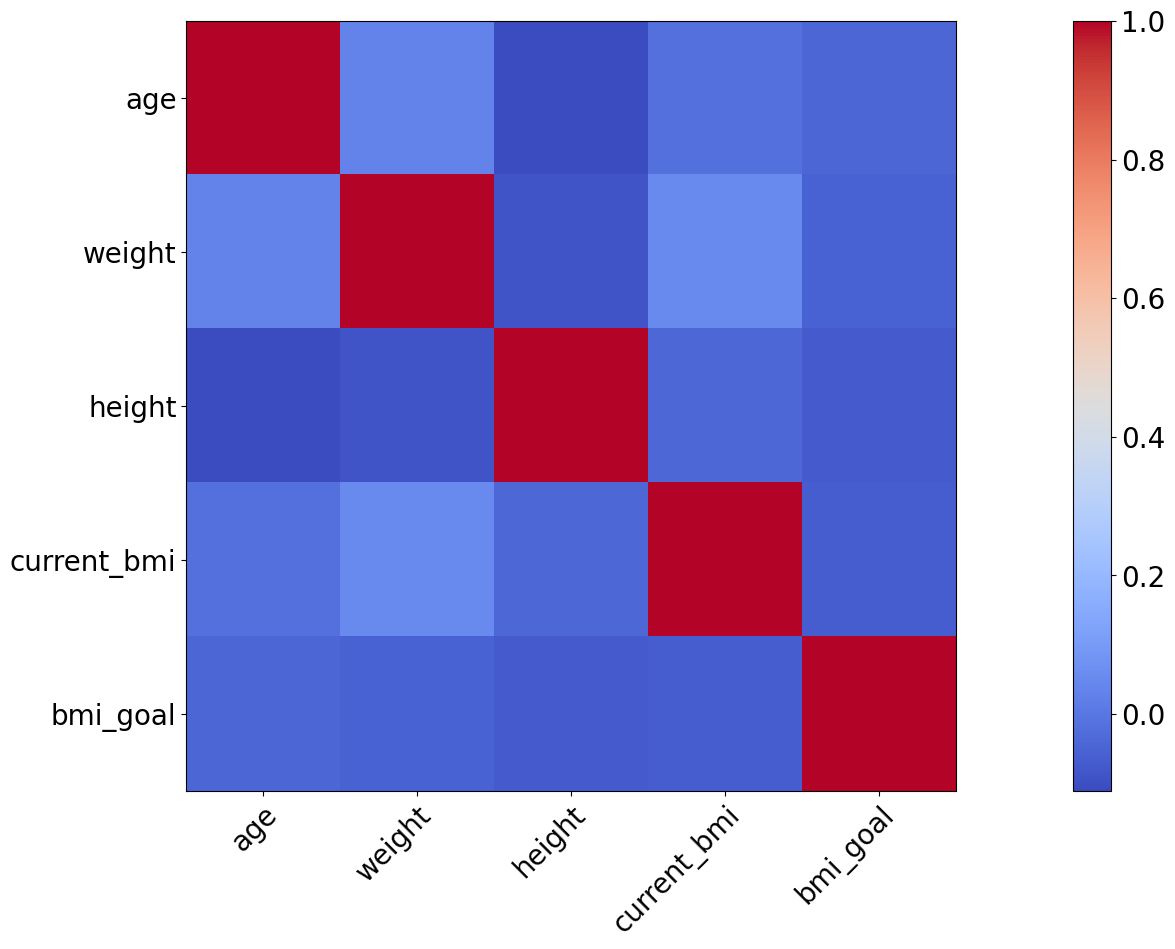

In [11]:
fig, ax = plt.subplots(figsize=(30, 10))
im = ax.imshow(corr_matrix, cmap='coolwarm')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.tick_params(labelsize=20)

ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, fontsize=20)
ax.set_yticklabels(corr_matrix.columns, fontsize=20)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.show()